In [5]:
# import libraries 

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12, 8)})

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) 

## Data Preparation and Cleaning 

#### 1. Read in the file using Pandas
#### 2. Look at some information about the data & the columns
#### 3. Fix any missing or incorrect values

In [6]:
# Read in the datafile using pandas

df = pd.read_csv(r'C:\Users\Ogunjimi\Desktop\Datasets\US_Accidents_Dec21_updated.csv')

In [6]:
# Set option to display all columns in the data

pd.set_option('display.max_columns', 47)

In [3]:
# Look at some information about the data & the columns

df

NameError: name 'df' is not defined

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [17]:
# Count Columns with Numeric Data

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)

len(numeric_df.columns)

14

### Percentage of missing values per column

In [5]:
missing = df.isna().sum().sort_values(ascending=False)

missing_percent = (missing/len(df))*100

missing_percent

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

In [22]:
# Remove columns with zeros

actual_missing_percent = missing_percent[missing_percent != 0]

actual_missing_percent

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

<AxesSubplot:>

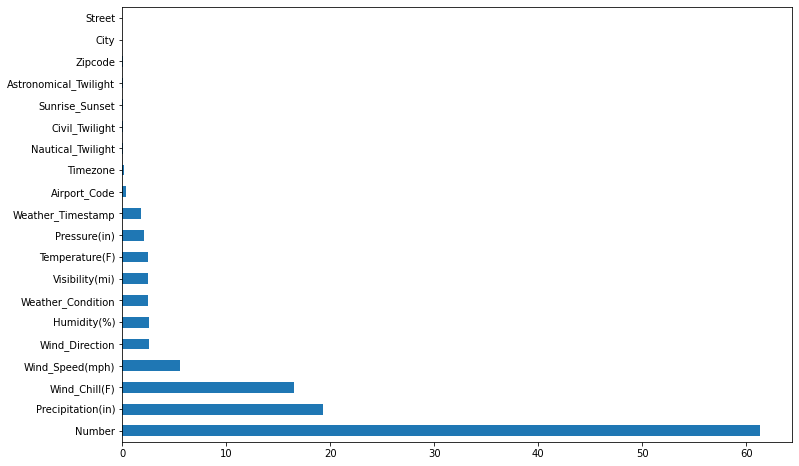

In [26]:
actual_missing_percent.plot(kind='barh', figsize=(12,8))

## Exploratory Analysis and Visualization

In [27]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Select columns to analyze

#### 1. City
#### 2. Start Time
#### 3. Start Lat, Start Long
#### 4. Weather Condition



### City

In [40]:
df['City']

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [41]:
# How many cities are in the dataset

cities = df['City'].unique()

len(cities)

11682

In [238]:
# Look at Number of accidents in cities (Group all accidents in cities where they occured)

cities_by_accidents = df['City'].value_counts()

cities_by_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

#### Top 20 cities by accidents

<AxesSubplot:>

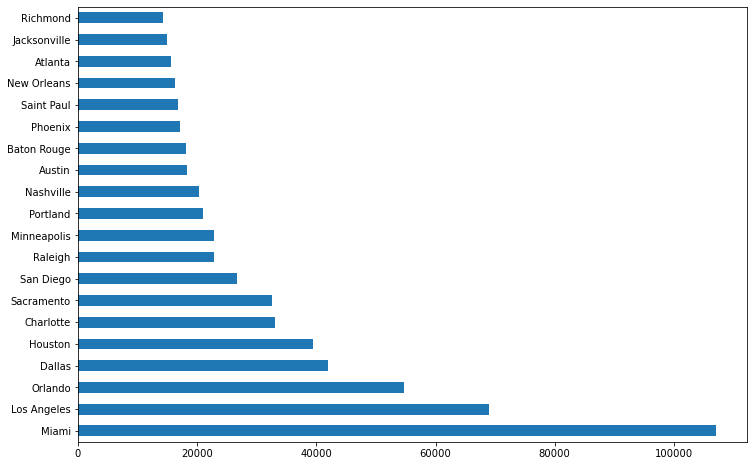

In [44]:
# Plot bar graph for only Top 20 Cities by accidents

cities_by_accidents[:20].plot(kind='barh', figsize=(12,8))

#### Create two categories of cities by accidents

In [21]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]

len(high_accident_cities)

496

In [26]:
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

len(low_accident_cities)

11185

#### Visualize categories of cities by accidents

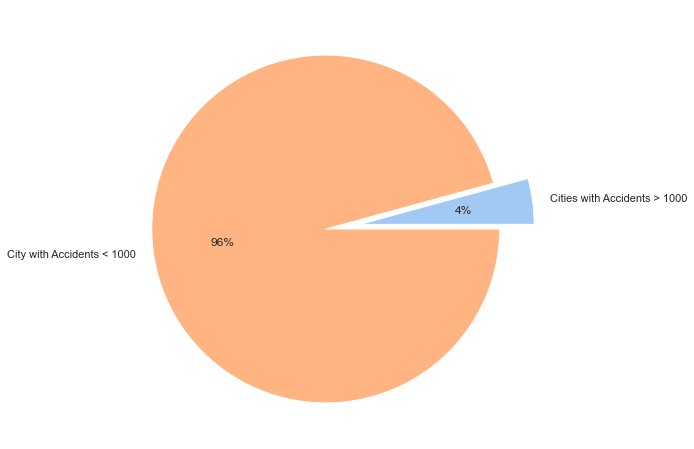

In [250]:
#define data
data = [len(high_accident_cities), len(low_accident_cities)]
labels = ['Cities with Accidents > 1000', 'City with Accidents < 1000']

#create pie chart
plt.pie(data, labels = labels, colors = colors, explode=[0, 0.2], autopct='%.0f%%')
plt.show()

#### Distribution of accidents across cities

C:\Users\Ogunjimi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

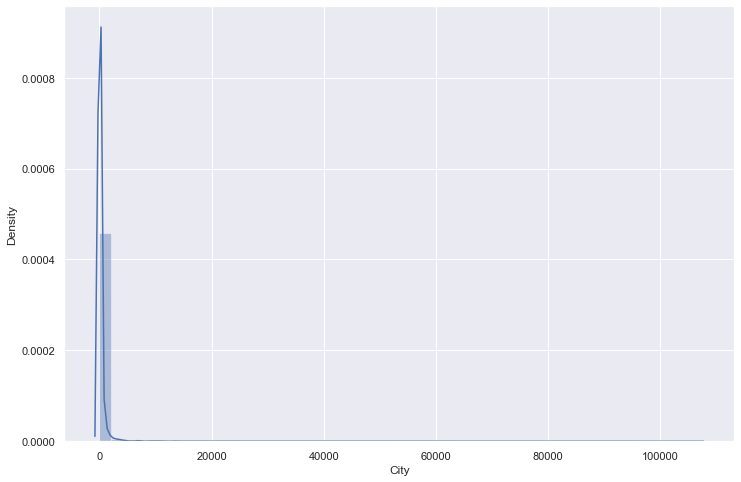

In [51]:
sns.distplot(cities_by_accidents)

<AxesSubplot:xlabel='City', ylabel='Count'>

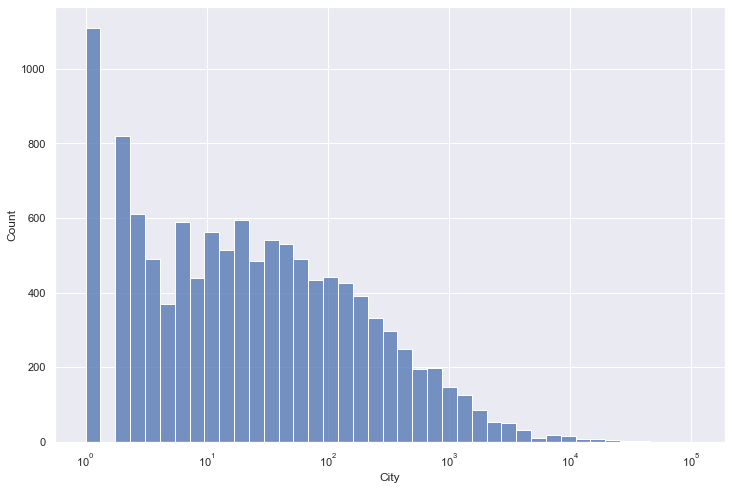

In [61]:
# Futher elaborate on the distribution of cities by accidents usig an histogram plot

sns.histplot(cities_by_accidents, log_scale=True)

#### What states do the cities with the highest accident counts belong to?

In [237]:
# Group city accidents by state and select top 100

states_by_accidents = df.groupby(['State']).City.value_counts().nlargest(100)

states_by_accidents

State  City       
FL     Miami          106896
CA     Los Angeles     68956
FL     Orlando         54654
TX     Dallas          41615
       Houston         39366
                       ...  
CA     Orange           3593
OH     Columbus         3550
UT     Ogden            3542
OR     Bend             3540
MD     Frederick        3524
Name: City, Length: 100, dtype: int64

In [218]:
# Convert above series to dataframe

states = states_by_accidents.to_frame().rename(columns={'City':'Accidents'}).reset_index()

states

,State,City,Accidents
0,FL,Miami,106896
1,CA,Los Angeles,68956
2,FL,Orlando,54654
3,TX,Dallas,41615
4,TX,Houston,39366
...,...,...,...
95,CA,Orange,3593
96,OH,Columbus,3550
97,UT,Ogden,3542
98,OR,Bend,3540


In [232]:
# List of States where top 100 cities by accidents belong to

states_of_top100_citiesbyaccidents = list(states.State.unique())

states_of_top100_citiesbyaccidents

['FL',
 'CA',
 'TX',
 'NC',
 'MN',
 'OR',
 'TN',
 'LA',
 'AZ',
 'GA',
 'VA',
 'IL',
 'UT',
 'MO',
 'NY',
 'DC',
 'WA',
 'SC',
 'IN',
 'CO',
 'PA',
 'MI',
 'OH',
 'OK',
 'MD',
 'AL']

In [233]:
len(states_of_top100_citiesbyaccidents)

26

In [239]:
# Percentage of Accidents in top 100 cities in Total Number of Accidents in the US

top100_total = states_by_accidents.sum()

top100_total

1146501

In [240]:
US_total = cities_by_accidents.sum()

US_total

2845205

In [245]:
percent = top100_total/US_total * 100

percent

40.29590134981487

### Conclusions from Exploration of Accident Data by Cities

##### 1. Accident records from 11,682 cities are present in the dataset (There are 19,502 incorporated cities in the USA)
##### 2. Less than 5% of the cities have more than 1,000 accidents 
##### 3. Majority of all cities have less than 5,000 accidents.
##### 4. 1100 cities have only one (1) accident recorded in the data
##### 5. The top 100 cities by accidents belong to 26 states (There are 49 states in the dataset)
##### 6. Accidents in these top 100 cities make up 40.3% of all accidents recorded in the USA within the period under review.

### Start Time

In [63]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [65]:
# Convert Start_Time from string datatype to datetime

df.Start_Time = pd.to_datetime(df.Start_Time)

In [66]:
# Confirm datatype conversion to Timestamp

df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [72]:
# Get Hour of day from timestamps

df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

#### Distribution by Hour of Day

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

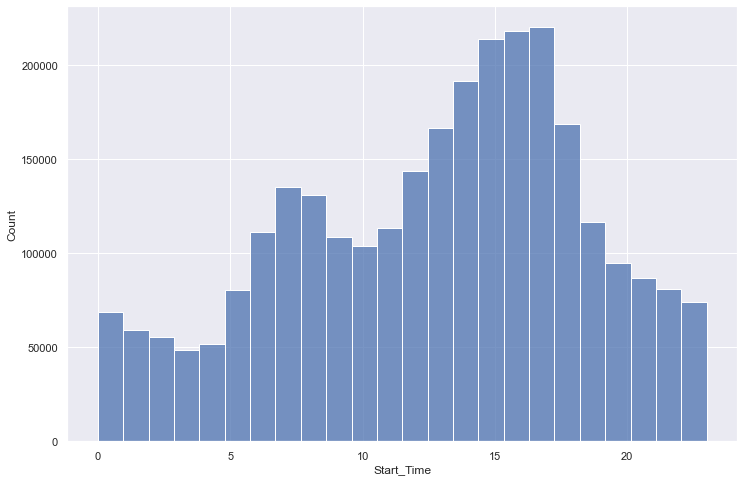

In [74]:
# Examine ditribution of accidents by hour of day

sns.histplot(df.Start_Time.dt.hour, bins=24)

C:\Users\Ogunjimi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

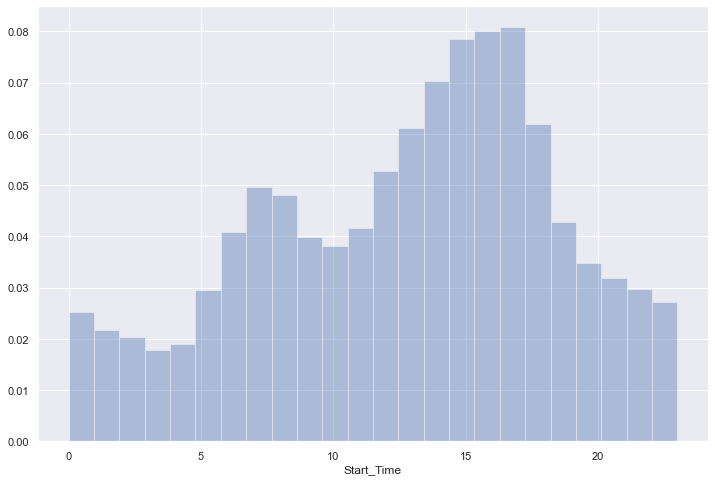

In [80]:
# Use percentages (on y_axis) to examine distribution of accidents by hour of day

sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

### Conclusion - Hour of Day

#### The highest percentage of accidents occur between 3pm and 8pm and the next highest percentage of accidents occur between 6am and 10am.
#### Probably due to 'Rush Hour' when people are in a rush to get back home from work or get to work in the morning and also these are times when there is more vehicular traffic on the road

In [81]:
# Get day of week from timestamps

df.Start_Time.dt.dayofweek

0          0
1          0
2          0
3          0
4          0
          ..
2845337    4
2845338    4
2845339    4
2845340    4
2845341    4
Name: Start_Time, Length: 2845342, dtype: int64

#### Distribution by Day of Week

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

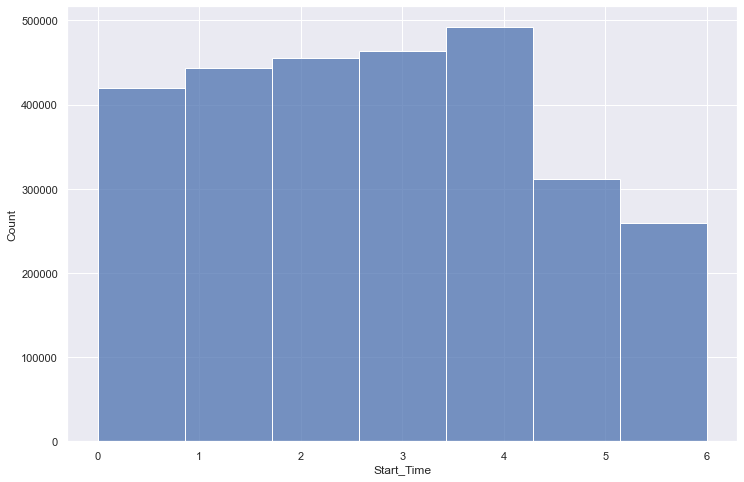

In [82]:
# Examine distribution of accidents by day of week

sns.histplot(df.Start_Time.dt.dayofweek, bins=7)

<AxesSubplot:xlabel='Start_Time'>

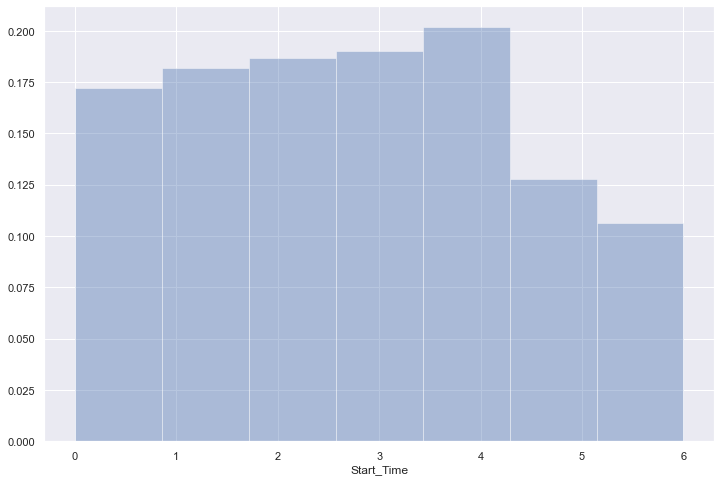

In [84]:
# Use percentages (on y_axis) to examine distribution of accidents by day of week

sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

### Conclusion - Day of Week

#### 1. The distribution is nearly evenly spreadout across the days of the week. 
#### 2. A little over 20% of all recorded accidents happen on a Friday
#### 3. Occurence of accidents are lower on the weekend (Saturday and Sunday)

### Question: Is the distribution by hour the same on weekends as on weekdays?

##### Compare Sunday and Monday only

<AxesSubplot:xlabel='Start_Time'>

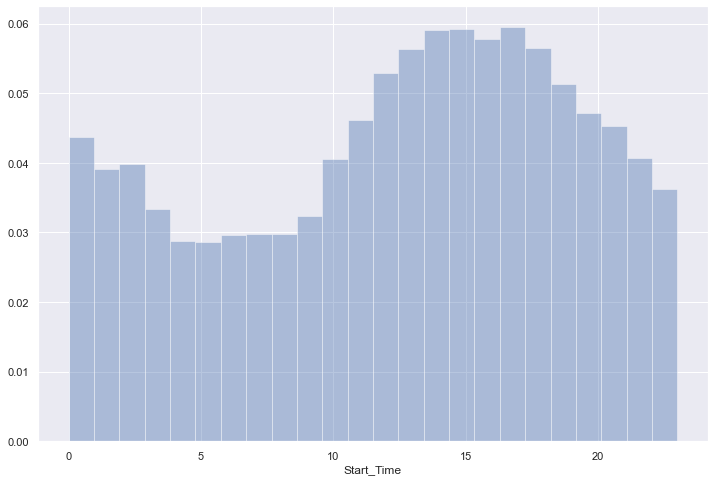

In [87]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True )

<AxesSubplot:xlabel='Start_Time'>

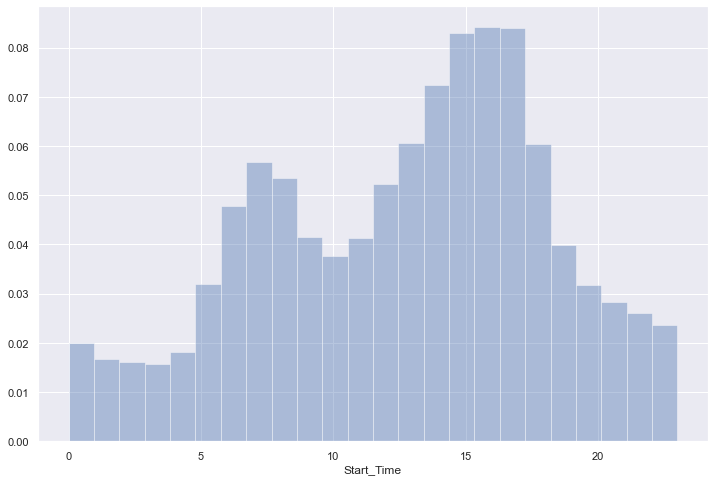

In [88]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist=True )

### Answer

#### On Sundays accidents are more spreadout during the day.
#### Highest percentage of accidents are normally distributed between 11am and 8pm (SIngle bell curve)

#### WHILE 

#### On mondays, Accidents are distributed around two peaks (People going to work & People returning from work)
#### Highest percentages 6am to 10am and 3pm to 6pm (Double Bell curves)

In [89]:
# Get Months from timestamp

df.Start_Time.dt.month

0          2
1          2
2          2
3          2
4          2
          ..
2845337    8
2845338    8
2845339    8
2845340    8
2845341    8
Name: Start_Time, Length: 2845342, dtype: int64

#### Distribution by Month

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

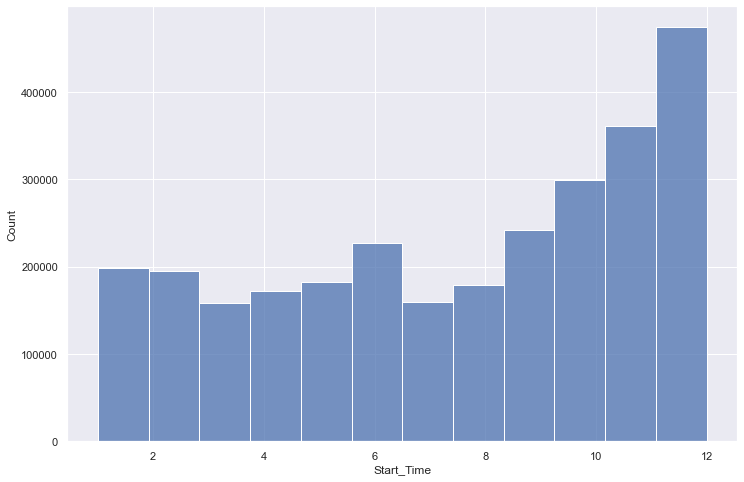

In [90]:
# Examine the distribution of accidents by month

sns.histplot(df.Start_Time.dt.month, bins=12)

C:\Users\Ogunjimi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

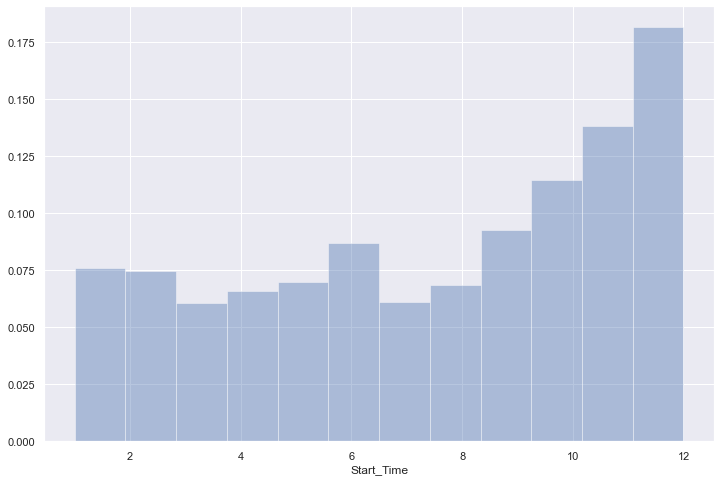

In [91]:
# Use percentages (on y_axis) to examine distribution of accidents by month

sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

### Conclusion - Month of Year

#### Although, there seems to be much missing monthly data for 2016, 2017 and 2020.
#### There seems to be a trend of higher percentage of accidents occuring in the winter months.

#### Trend of accidents year over year (increasing or decreasing)

In [7]:
# Select a sample df because df is too large and time intensive

# METHOD 1
sample_df = df.sample(int(0.001 * len(df)))



# METHOD 2
#sample = df.sample(frac=0.001)

In [9]:
# Select a sample dataframe for this analysis

sample_df.Start_Time = pd.to_datetime(sample_df.Start_Time)

In [10]:
# Group number of accidents by year

accidents = sample_df.groupby([sample_df.Start_Time.dt.year])['Start_Time'].agg('count')

accidents

Start_Time
2016     124
2017     154
2018     163
2019     240
2020     637
2021    1527
Name: Start_Time, dtype: int64

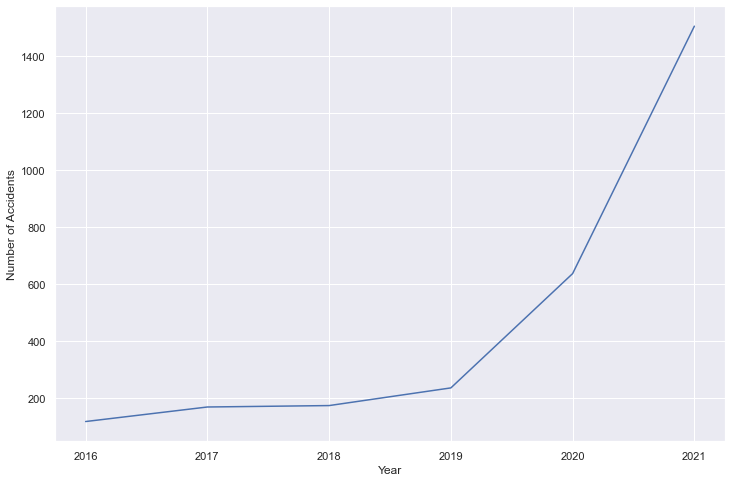

In [255]:
# Plot line chart (for time-series data) to show trend of accidents year over year

accidents.plot(kind='line', figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

### Conclusion - Trend of Accidents Year over Year

#### There appears to be an increasing number of accidents year over year from 2016 to 2021

### Start Latitude & Longitude

In [139]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [141]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

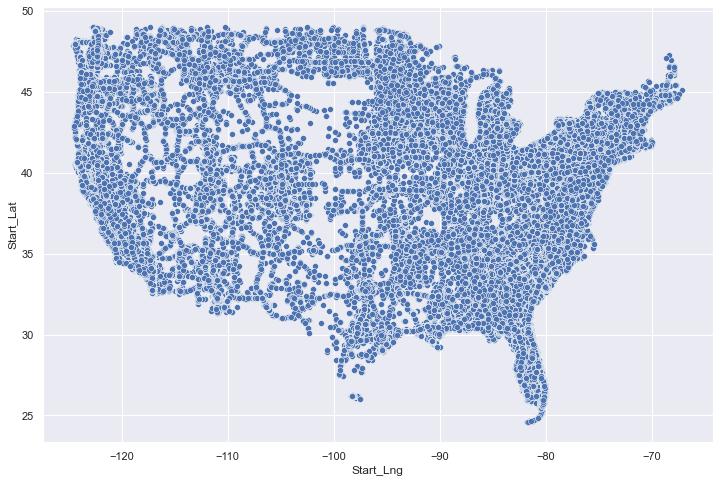

In [144]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [11]:
import folium
from folium.plugins import HeatMap

In [12]:
# Create lat long pairs for folium map viz to examine accident hotspots on map

lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))


In [13]:
# Plot Lat Lon Pairs on Folium Map

map = folium.Map()

HeatMap(lat_lon_pairs).add_to(map)

In [14]:
map

### Conclusion - Location of Accidents (Geographic data)

#### Accidents are concentrated in cities along the coast.
#### Probably due to higher population density in those cities and hence higher volume of vehicular traffic

### Weather Condition

In [15]:
sample_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
weather = sample_df.Weather_Condition.value_counts()

In [172]:
relevant_weather = weather[weather > 5]

relevant_weather

Fair                1116
Cloudy               372
Mostly Cloudy        362
Partly Cloudy        231
Clear                191
Light Rain           131
Overcast              82
Fog                   47
Haze                  40
Light Snow            37
Scattered Clouds      35
Rain                  33
Cloudy / Windy        11
Heavy Rain            10
Fair / Windy           9
Wintry Mix             8
Snow                   6
T-Storm                6
Name: Weather_Condition, dtype: int64

<AxesSubplot:>

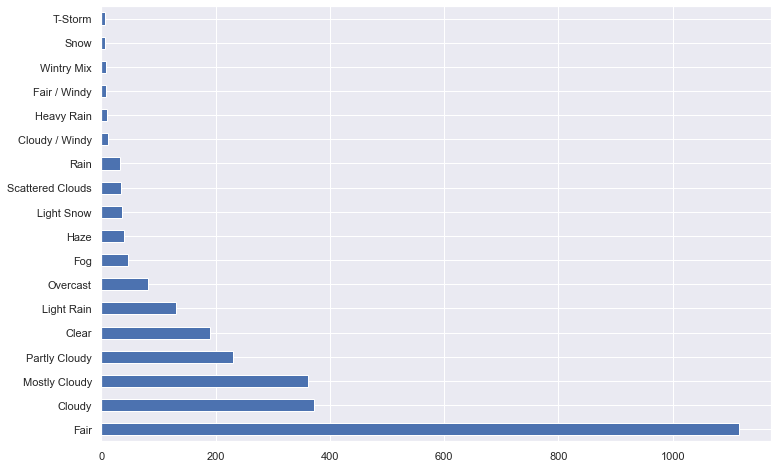

In [59]:
relevant_weather.plot(kind='barh', figsize=(12,8))

#### Examine correlation between weather condition and severity of accident

In [77]:
# isolate data from both columns

data = sample_df[['Severity', 'Weather_Condition']]

data

,Severity,Weather_Condition
899137,2,Fair
228013,2,Partly Cloudy
463984,2,Wintry Mix
23219,2,Clear
2025185,2,Fair
...,...,...
1019281,2,Light Snow
1216494,2,Fair
855645,2,Fair
43279,2,Mostly Cloudy


In [78]:
data.apply(lambda x: x.factorize()[0]).corr()

,Severity,Weather_Condition
Severity,1.000000,0.067311
Weather_Condition,0.067311,1.000000


### Conclusion - Weather Condition


#### Majority of accidents occured in Fair weather conditions
#### Correlation analysis is based on Sample data (2,845) representing 1% of the entire dataframe
#### There appears to be no correlation between weather condition and severity of accidents.

In [ ]:
# Ask and answered questions

# Which states do the top 100 cities by accidents belong to?
# What time of day are accidents most frequent?
# Which days of the week has the most accidents?
# Which months have the most accidents?
# What is the trend of accidents year over year (decreasing or increasing)?